In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.17.4


In [3]:
my_arr = np.array([[10, 20, 30], [40, 50, 60]])
print(my_arr)

[[10 20 30]
 [40 50 60]]


In [4]:
type(my_arr)

numpy.ndarray

In [5]:
my_arr

array([[10, 20, 30],
       [40, 50, 60]])

In [6]:
np.sum(my_arr)

210

In [7]:
import matplotlib.pyplot as plt

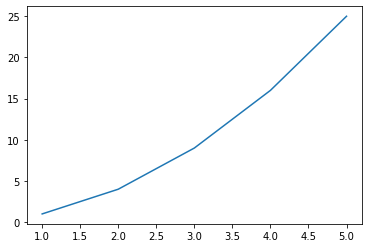

In [8]:
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
plt.show()

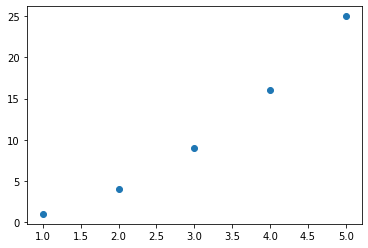

In [9]:
plt.scatter([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
plt.show()

In [10]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [11]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [12]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [13]:
diabetes.target[:3]

array([151.,  75., 141.])

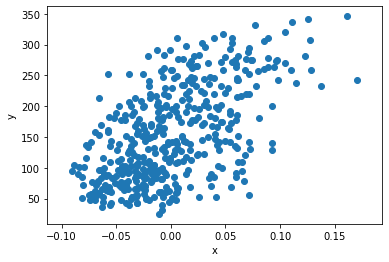

In [14]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
x = diabetes.data[:, 2]
y = diabetes.target

In [16]:
w = 1.0
b = 1.0

In [17]:
y_hat = x[0]*w + b
print(y_hat)

1.0616962065186886


In [18]:
print(y[0])

151.0


In [19]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [20]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [21]:
print(x[0])

0.0616962065186885


In [22]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [23]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [24]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [25]:
b_new = b + 1
print(b_new)

2.0


In [26]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [27]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [29]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


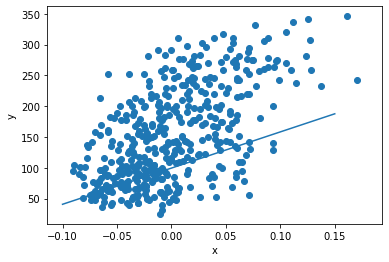

In [30]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


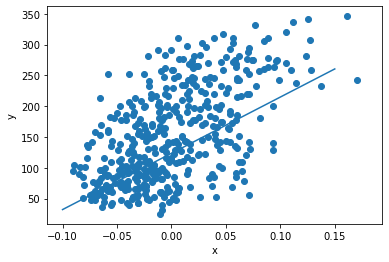

In [32]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


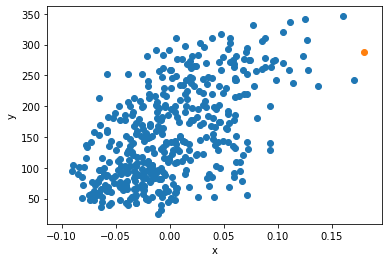

In [34]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
y_hat = x_i * w + b
err = y_i - y_hat # y변수 차이
w_rate = x_i # 변화율은 초기 x값과 동일
w = w + w_rate * err # 오차역전파를 이용한 가중치 업데이트 공식 = 제곱 오차를 미분

In [36]:
b = b * 1 + err # 절편 업데이트

In [50]:
class Neuron:
    
    # 시작 임의값 지정
    def __init__(self):
        self.w = 1.0 # 가중치 초기화
        self.b = 1.0 # 절편 초기화
    
    # 정방향 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b # 직선 방정식 계산
        return y_hat
    
    # 역방향 계산(backpropagation)
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 gradient
        b_grad = 1 * err # 절편에 대한 gradient
        return w_grad, b_grad
    
    # 훈련을 위한 메서드
    def fit(self, x, y, epochs=100):
        for i in range(epochs): # epochs 만큼 반복
            for x_i, y_i in zip(x, y): # 모든 샘플에 대해 반복
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat) # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트

In [51]:
# 학습
neuron = Neuron()
neuron.fit(x, y)

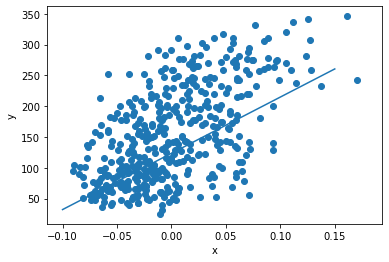

In [52]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()